In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
if not os.path.isdir('models'):
    os.mkdir('models')

1 Physical GPUs, 1 Logical GPUs


170500096/170498071 [==============================] - 159s 1us/step


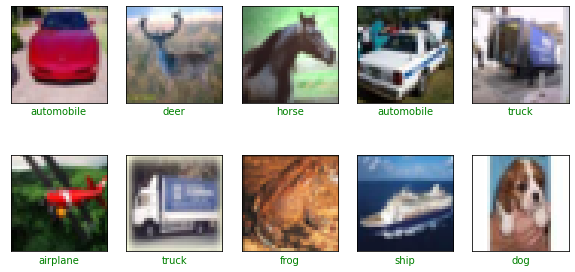

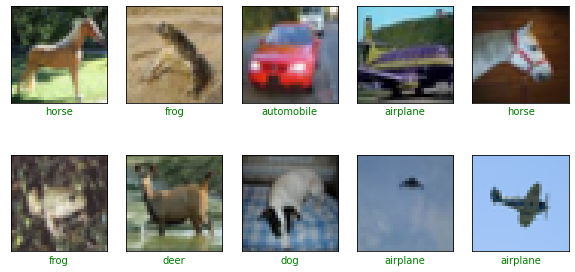

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

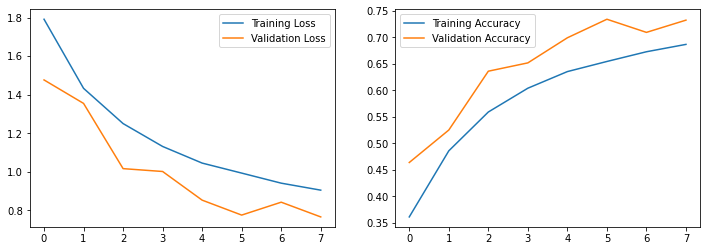

OSError: SavedModel file does not exist at: models/model_0.913.h5/{saved_model.pbtxt|saved_model.pb}

In [4]:
#print('tensorflow version :',tf.__version__)
#print('is gpu aviliable?', tf.config.list_physical_devices())

def get_classes(x,y):
    indices_0 , _ = np.where(y == 0)
    indices_1 , _ = np.where(y == 1)
    indices_2 , _ = np.where(y == 2)
    indices_3 , _ = np.where(y == 3)
    indices_4 , _ = np.where(y == 4)
    indices_5 , _ = np.where(y == 5)
    indices_6 , _ = np.where(y == 6)
    indices_7 , _ = np.where(y == 7)
    indices_8 , _ = np.where(y == 8)
    indices_9 , _ = np.where(y == 9)
        
    indices = np.concatenate([indices_0,indices_1,indices_2,indices_3,indices_4,indices_5,
                              indices_6,indices_7,indices_8,indices_9], axis=0)    

    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace = False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return(x,y)

(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_classes(x_train, y_train)
x_test, y_test = get_classes(x_test, y_test)

#print(x_train.shape,y_train.shape)
#print(x_test.shape,y_test.shape)





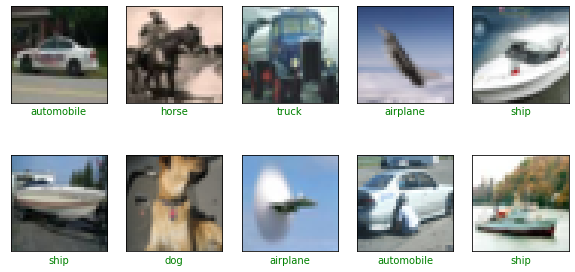

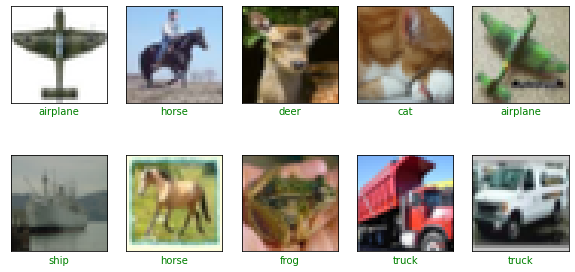

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 64)       

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()
    
show_random_examples(x_train, y_train, y_train)
show_random_examples(x_test, y_test, y_test)

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Dense, Flatten, Input

def Create_model():
    def add_convo_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation = 'relu', padding = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    model = tf.keras.Sequential()
    model.add(Input(shape = (32, 32, 3)))
    
    moddel = add_convo_block(model, 32)
    moddel = add_convo_block(model, 64)
    moddel = add_convo_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )
    return model
model = Create_model()
model.summary()


In [10]:
h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=50, batch_size=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/50
5000/5000 [==============================] - 24s 5ms/step - loss: 0.8161 - accuracy: 0.7184 - val_loss: 0.6882 - val_accuracy: 0.7672
Epoch 2/50
5000/5000 [==============================] - 23s 5ms/step - loss: 0.7954 - accuracy: 0.7244 - val_loss: 0.6571 - val_accuracy: 0.7742
Epoch 3/50
5000/5000 [==============================] - 23s 5ms/step - loss: 0.7827 - accuracy: 0.7296 - val_loss: 0.6799 - val_accuracy: 0.7717
Epoch 4/50
5000/5000 [==============================] - 25s 5ms/step - loss: 0.7769 - accuracy: 0.7343 - val_loss: 0.6519 - val_accuracy: 0.7813
Epoch 5/50
5000/5000 [==============================] - 26s 5ms/step - loss: 0.7655 - accuracy: 0.7364 - val_loss: 0.6634 - val_accuracy: 0.7732
Epoch 6/50
5000/5000 [==============================] - 24s 5ms/step - loss: 0.7563 - accuracy: 0.7404 - val_loss: 0.6560 - val_accuracy: 0.7855
Epoch 7/50
5000/5000 [==============================] - 23s 5ms/step - loss: 0.7430 - accuracy: 0.7436 - val_loss: 0.6460 - val_ac

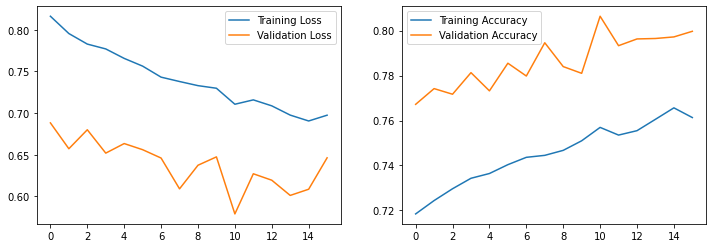

In [11]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()


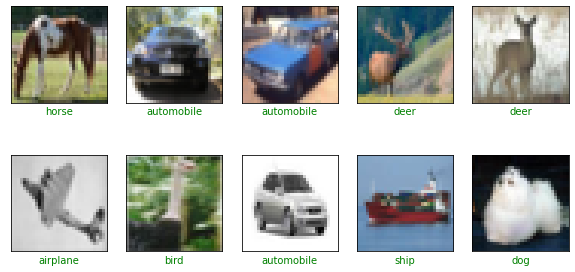

In [12]:
model = tf.keras.models.load_model('models/model_0.806.h5')
preds = model.predict(x_test/255.)

show_random_examples(x_test, y_test, preds)